In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Common_Functions as cmn

# Correlation Matrix on the Training Dataset

Before continuing, we want to visualize the most important variables that affect the SalePrice based on the trimmed dataset (without strings). Before starting this part, we hypothesized that:
* Overall Quality:
* Overall Condition:
* Ground Living Area:

would have the greatest impact on sale price.

In [21]:
training_data = cmn.get_stringless_training_data()
display(training_data.shape, training_data.head())

(1460, 37)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
sns.set_context("paper")
sns.set_style("ticks")

# Matrix

Below is the complete matrix for the whole dataset (without strings), but to us it looks too convoluted and too difficult to understand. therefore, in the next step we decided to reduce the number of correlations in the matrix to only those that score above a 0.6 in the bottomost row, as these are the variables tha influencce home prices the most.

<AxesSubplot:>

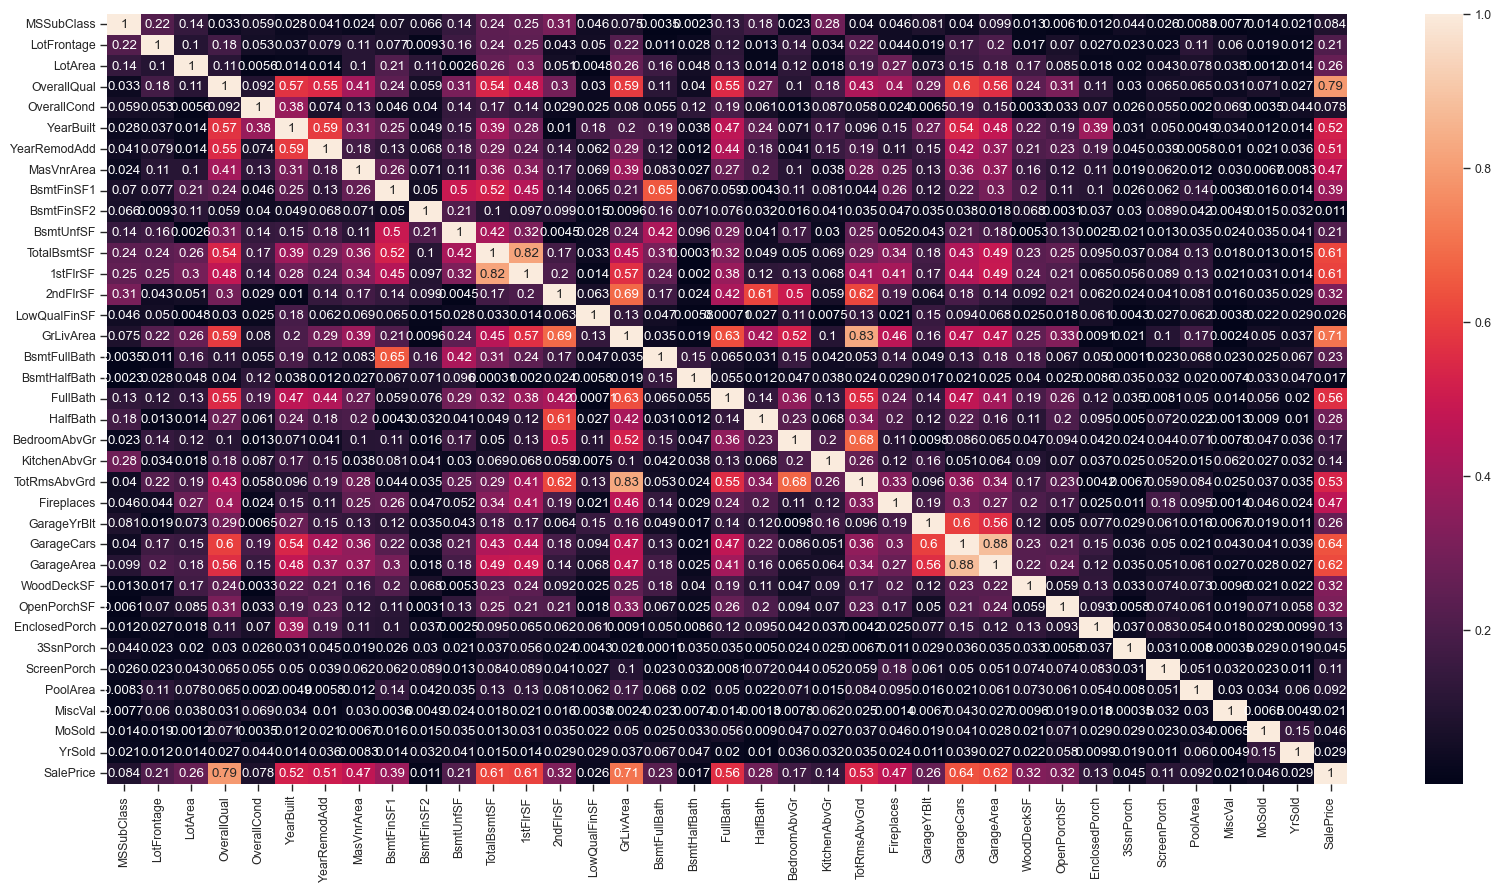

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(training_data.corr().abs(),  annot=True)

# Trimmed Matrix
As we can see here, the trimmed matrix has only 6 columns that scored above a 0.60. These are Overall Quality, Total basement square feet, first floor square feet, ground living area, garage cars and garage area. Based on this metric, our hypothesis was somewhat correct. The most important variable for this dataset seems to be the overall quality with a score of 0.79, and the second most variable was the Ground living area with 0.71. However, what we did not expect was the high values that basement and garage values received.

What does this tell us though? Houses that have a basement/garage and/or have a big basement/garage are valued higher as these are houses that are most likely bigger in size than those that have low scores in these variables.

We did not expect overall condition to have such a low score based on our initial thoughts, as this seemed to only have a value of 0.078. It seems, the overall condition is less important as after a house is sold, this is one aspect that can easily be fixed/remade, but a characteristic such as the square footage cannot be changed easily.

(7, 7)


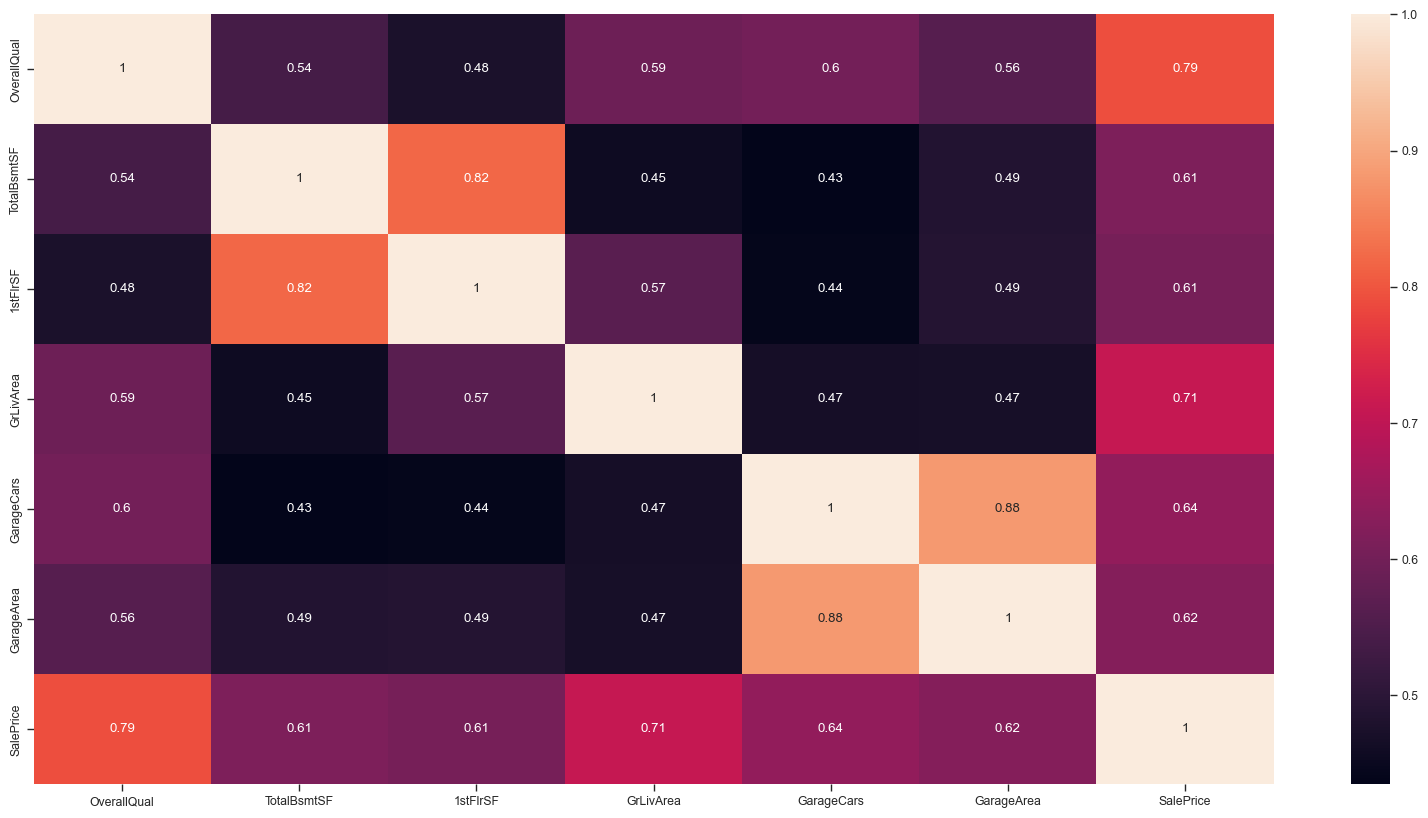

In [25]:
matrix = cmn.plot_matrix(data=training_data, threshold=0.6)
#plt.title("Correlation Matrix for Most Important Variable")

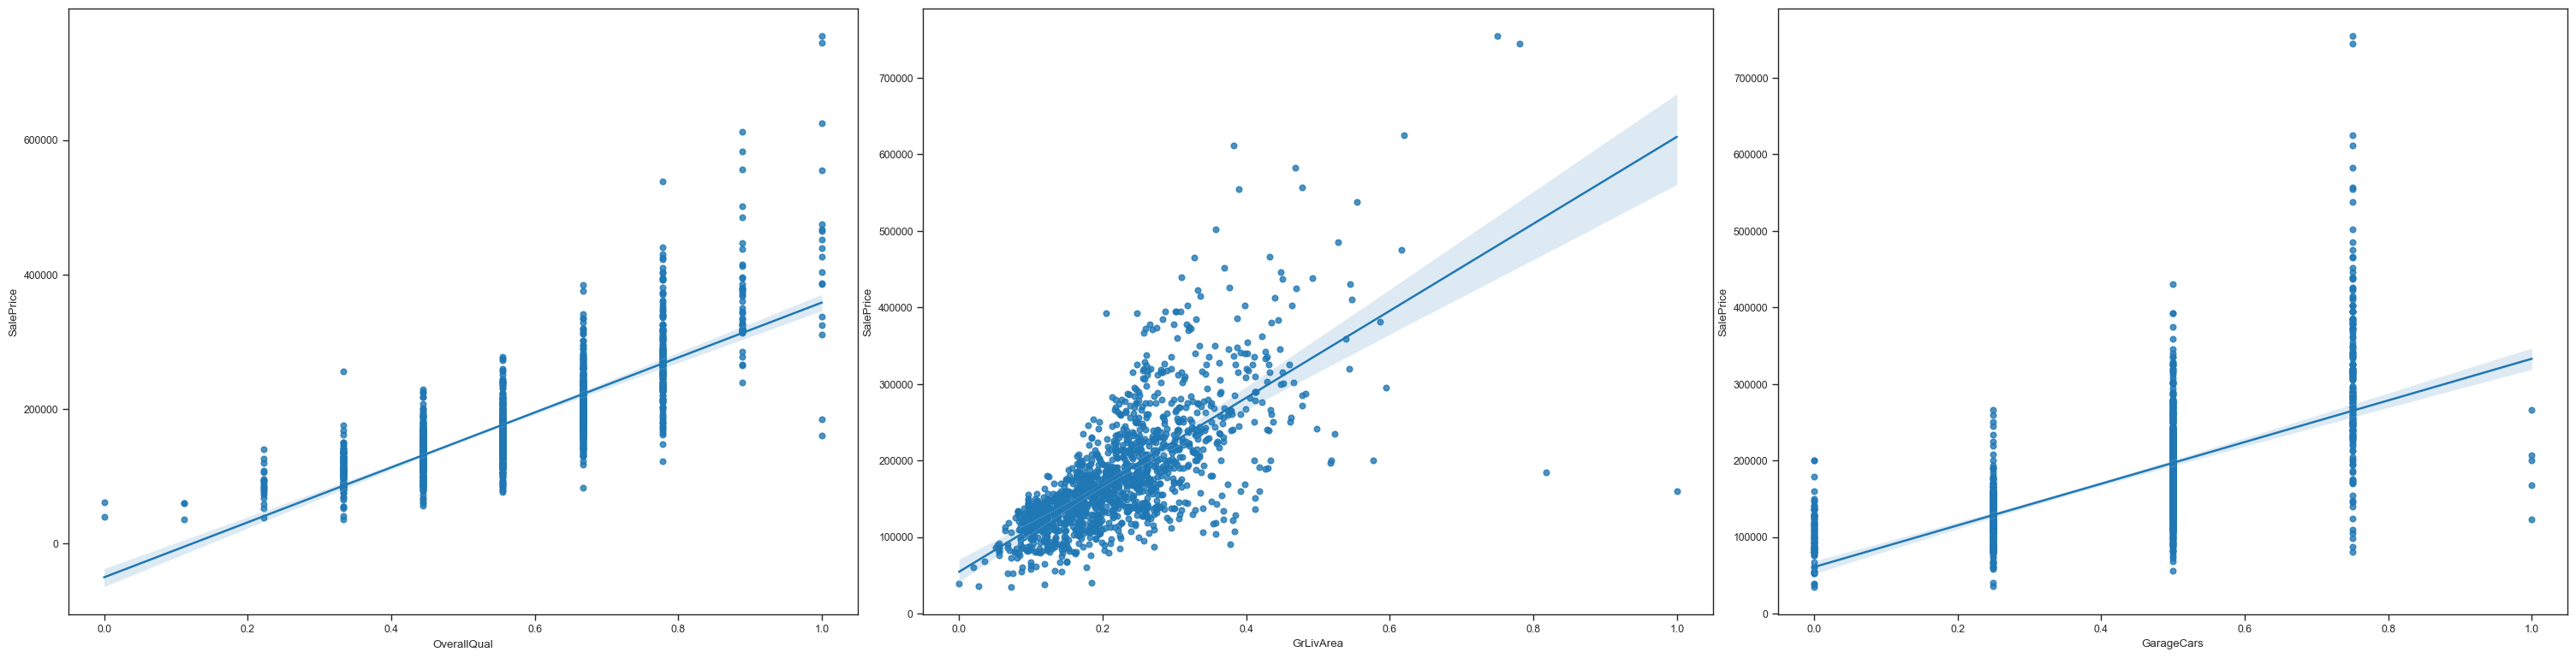

In [26]:
matrix = matrix.reset_index()
#selected_columns = (matrix['index'].tolist())[:-1]
selected_columns = ["OverallQual", "GrLivArea", "GarageCars"]
cmn.plot_multi_scatter(columns=selected_columns, y_feature_name='SalePrice', data=training_data, column_len=3, row_len=1, fig_size=(30,7.6))